# Notes on GARCH Models Course

* **GARCH** Stands for Generalized AutoRegressive Conditional **Heteroskedastiscity**. In ancient greek: _hetero_ - "different" + _skedasis_ "dispersion".
  * The sytematic varying of the volatility of a time series.
* * Heteroskedasticity makes time-series modelling difficult due to the nature of the implied varying levels of fluctuations.
* The predecessor of GARCH is the ARCH model. It was invented to better describe time series with varying volatility (heteroskedastic). It's based on the assumption that the conditional variance errors by random model errors is dependent on the variance errors of the previous period. 
  * i.e. the variance error is _serially autocorrelated_
*  A common example of the difficulties with heteroskedastic time-series are **"volatility clusters"**. Commonly, a sudden upsurge of prices is followed by even more general trend to higher prices. This is due to the shock reaction of the market to rising prices and only the slow recovery from this shock attitude. [Example Image](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse1.mm.bing.net%2Fth%3Fid%3DOIP.VuWn7iL47b7_3kYHNknDTwHaE4%26pid%3DApi&f=1).
*  (G)ARCH makes prediction on the change in residual. A higher residual (i.e. higher volatility) calls for a prediction of following higher residual (following higher volatility).
*  A **residual** is the difference of an expected (predicted) value to the actual (observed) value. (`residual = predicted - observed`).
* Robert F. Engie, the inventor of the ARCH model,later received the Nobel Prize of Economy for his invention.
* The main difference between GARCH and ARCH Model is GARCH's implementation of a moving average over time. The new parameter `p` for number of lag variances to include allows the prediction of change in variance over time as well as time-dependent variance.
* GARCH is used nowadays for financial analyises due to its higher precision. 
* GARCH has received multiple extensions (e.g. IGARCH, EGARCH) due to its prediction biases. For example, GARCH assumes the same effect on volatility for both good and bad news, i.e. fails to include the "leveraging" effect on uplifting news to disrupt high volatility. 

  
### Nature of the GARCH Model
* The GARCH Model is basically made out of three variance forecasts:
  * One is the constant `ω` (omega) that takes the long-run average into consideration.
  * One is the forecast `α` (alpha) that introduces new information that was not yet available in the previous forecast.
  * The last one is a forecast `β` (beta) made in the previous period.

The weights of these three determine how fast the variance chances with new information available. Furthermore, it determines how fast the prediction returns to its long-term mean.

* Autoregressive: predictions on the behaviour in the future are based on behaviours of the past.
* Volatility acts as a weighted average of past information.
* The larger `α` (alpha), the bigger the immediate impact
* The larger `β` (beta), the longer the duration of the impact


### ${\displaystyle \sigma _{t}^{2}=\omega +\alpha _{1}\epsilon _{t-1}^{2}+\cdots +\alpha _{q}\epsilon _{t-q}^{2}+\beta _{1}\sigma _{t-1}^{2}+\cdots +\beta _{p}\sigma _{t-p}^{2}=\omega +\sum _{i=1}^{q}\alpha _{i}\epsilon _{t-i}^{2}+\sum _{i=1}^{p}\beta _{i}\sigma _{t-i}^{2}}$

Where $ϵ$ is the error (return residuals with respect to the mean process).


### Use in Python

Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.8227707742444
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655476132302
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.9638282471874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.9638282464352
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2771.96
Distribution:                  Normal   AIC:                           5551.93
Method:            Maximum Likelihood   BIC:                           5574.95
                                        No. Observations:                 2336
Date:             

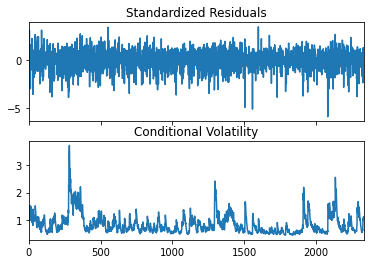

In [155]:
from arch import arch_model
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

sp_data = pd.read_csv("./datasets/SP500.csv")

# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

# Display model fitting summary
print(gm_result.summary())

# Plot fitted results
gm_result.plot()
plt.show()

### Standardized Residuals
A residual is the difference between the predicted return and the mean return. 
If we want to compare the residual of two different assets, we may come across a big difference in the number scale of the residuals between the respective assets. To be able to compare residuals between assets, we need to standardize them into one format. A residual is therefore put in _relation to_ the computed (conditional) volatility. As such, we can compare the relative standarized residual of two assets.

### ${std Resid={{\varepsilon}_{t} \over {\sigma}_{t}}}$

where ${\varepsilon}_{t}$ is the return through

### ${{\varepsilon}_{t} = {{\sigma}_{t} * {z}_{t} }}$

with ${{z}_{t}}$ being a white noise process.

### Mean Model assumptions
The mean has an influence on the forecast of our model. Generally, the simplest approach for a mean computation is as a _constant mean_. The mean _can_ be separately computed and fetched into the GARCH model by using `zero` for the `mean` parameter. A mean can also be autoregressively computed with `AR` for the `mean` parameter.

### Asymmetrical Shocks
The standard GARCH model assumes that both positive and negative news have the same impact on volatility. In reality, negative news have a stronger impact on the drop of a stock, while positive news have a mediocre impact on the rise of a stock's value. Colloquially, its said that a stock "takes the stairs up and the elevator down", i.e. the value grows slowly but falls fast.

Therefore, GJR-GARCH and EGARCH (Exponential) have been developed to cover this phenomena into the model. GJR-Garch introduces a conditional parameter that will add weight to the ${{\alpha}}$ calculation if ${{r}_{t-1}}$ (residual) is negative.

In [156]:
bitcoin_data = pd.read_csv("./datasets/bitcoin.csv")

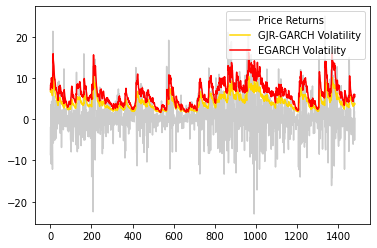

In [157]:
#### Fit GJR-GARCH, EGARCH to cryptocurrency

gjr_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'GARCH', dist = 't')
gjrgm_result = gjr_gm.fit(disp = 'off')
gjrgm_vol = gjrgm_result.conditional_volatility

egarch_gm = arch_model(bitcoin_data['Return'], p = 1, q = 1, o = 1, vol = 'EGARCH', dist = 't')
egarch_result = egarch_gm.fit(disp = 'off')
egarch_vol = egarch_result.conditional_volatility

# Plot the actual Bitcoin returns
plt.plot(bitcoin_data['Return'], color = 'grey', alpha = 0.4, label = 'Price Returns')

# Plot GJR-GARCH estimated volatility
plt.plot(gjrgm_vol, color = 'gold', label = 'GJR-GARCH Volatility')

# Plot EGARCH  estimated volatility
plt.plot(egarch_vol, color = 'red', label = 'EGARCH Volatility')

plt.legend(loc = 'upper right')
plt.show()


### Expanding and Sliding Rolling Window Forecasting
The great achievement of reading financial data is the attempt to predict future patterns. We can achieve a lot with a rolling window approach to make predictions about the future from past behaviour. We can start with a small starting window and increase the width of the window incrementally. In contrary to other domains, with financial data, this approach of an _expanding_ rolling window **does not translate to** "more data = better results". Financial assets have changing dependent variables over the course of time, so recent data could and should be weighted appropriately in a forecast. We can therefore also use a _sliding_ rolling window to limit the range of data the latest iteration of the forecast is working with.

![Visual to Expanding vs. Sliding Rolling Window](images/rolling-window-forecasts.png)
(Image Source: https://stackoverflow.com/questions/56601488/is-there-a-way-to-get-a-sliding-nested-cross-validation-using-sklearn)


## Model Performance Evaluation

### Null Hypothesis on Parameter relevance
The GARCH model requires many parameters as ${\alpha}$, ${\beta}$, ${\omega}$ etc. to be defined. We can check the significance of a parameter by testing against a null hypothesis (H0) with the p- and t-values of a parameter. Our H0 hypothesis states that the parameter is zero. By standard, we require a 95% confidence level to regard the H0 thesis as relevant. Therefore, if the p-value of a parameter is below 0.05, we discard the H0 hypothesis as false and assume a signifiance of the parameter.

With t-statistics, we can also decide on the necessity of a parameter. The t-statistic is the difference of estimated parameter value and expected mean in relation to the standard error. 

## ${t_{\bar{x}} = {{\bar{x}} - {\mu_{x}} \over {s.e.({\bar{x}})} }}$

with ${\bar{x}}$ being the estimator of the parameter, ${\mu_{x}}$ the mean of ${x}$ and divided through the standard error (_s.e._) of the estimator ${\bar{x}}$

#### Testing the p-value

In [158]:
# Specify GARCH model assumptions
basic_gm = arch_model(sp_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'EGARCH', dist = 't')

gm_result = basic_gm.fit(update_freq = 3)

para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'p-value': gm_result.pvalues})

# Print out parameter stats
print(para_summary)

Iteration:      3,   Func. Count:     28,   Neg. LLF: 32364.744926981235
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2698.0924459897824
Iteration:      9,   Func. Count:     73,   Neg. LLF: 2697.3907687321343
Iteration:     12,   Func. Count:     90,   Neg. LLF: 2697.3902945394357
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2697.390294539466
            Iterations: 12
            Function evaluations: 90
            Gradient evaluations: 12
          parameter        p-value
mu         0.083658  8.033389e-128
omega      0.006461   4.365240e-01
alpha[1]   0.310718   3.585945e-15
beta[1]    0.962934   0.000000e+00
nu         4.879700   9.604650e-22


In the above example, the `omega` value is bigger than 0.05 (value: 0.43) and therefore makes the H0 hypothesis significant. `omega` should therefore be considered as a relevant parameter.

#### Testing with t-statistics
By the standard, we assume that any t-statistic higher than 2 is pointing out that the parameter is likely to _not be_ zero. The t-statistic is describing the distance of the value from 0 per standard error. A t-statistic of two is describing a difference of 2 standard errors from 0 therefore.

In [159]:
# Get parameter stats from model summary
para_summary = pd.DataFrame({'parameter':gm_result.params,
                             'std-err': gm_result.std_err, 
                             't-value': gm_result.tvalues})

# Verify t-statistic by manual calculation
calculated_t = para_summary['parameter']/para_summary['std-err']

# Print calculated t-value
print(calculated_t)

# Print parameter stats
print(para_summary)

mu          24.051593
omega        0.778076
alpha[1]     7.868613
beta[1]     91.944702
nu           9.581068
dtype: float64
          parameter   std-err    t-value
mu         0.083658  0.003478  24.051593
omega      0.006461  0.008304   0.778076
alpha[1]   0.310718  0.039488   7.868613
beta[1]    0.962934  0.010473  91.944702
nu         4.879700  0.509306   9.581068


The t-statistics are in agreement with the p-values, highlighting that only the `omega` value is under our threshold of 2, indicating that the omega parameter is not statistically significant and can be left out of the model.

### Validation of GARCH model assumptions

#### ACF
We should validate that the standardized residuals in our GARCH model are not autocorrelated, meaning there should be no correlation with itself given a time lag. The standardized residual should be close to a random white noise.

An Autocorrelation Function (ACF) can scan for potential autocorrelation of a value (in our case: std. residuals).
An ACF plot can visualize the autocorrelation of our std. residuals by provided lags.


Iteration:      4,   Func. Count:     31,   Neg. LLF: 3733.8227707742444
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2771.9655476132302
Iteration:     12,   Func. Count:     73,   Neg. LLF: 2771.9638282471874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2771.9638282464352
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


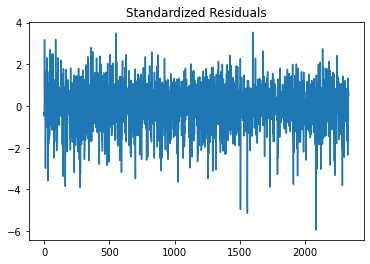

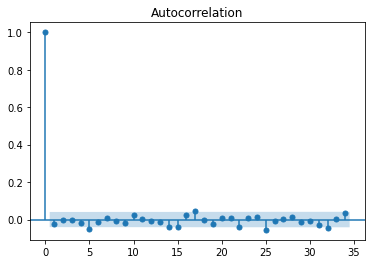

In [160]:
from statsmodels.graphics.tsaplots import plot_acf

# Create and fit model for S&P 500 return data
sp_garch = arch_model(sp_data["Return"], p = 1, q = 1, mean = "constant", vol = "GARCH", dist = "normal")
sp_result = sp_garch.fit(update_freq=4)

std_resid = sp_result.std_resid

# Plot the standardized residuals
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

# Generate ACF plot of the standardized residuals
plot_acf(std_resid, alpha = .05)
plt.show()

The standard residual indicates no clustering and is similar to a white noise pattern. This is a good indicator that our model is sound.

The data points of our autocorrelation check highlights that most values are in or close to our confidence level of 95% (0.05), meaning that the chance for an autocorrelation is very low (below or about 5%). The value for an autocorrelation of the first value in the time-series is 1.0, as the relation from _t0_ to itself is self-evidently complete.

#### Ljung-Box test
A Ljung-Box test is another statistical test for any group of autocorrelations in a time series. It's null hypothesis can be stated as: The data are independently distributed (no observed (serial) correlation). It's a test widely used in time series analysis as in this example of econometrics.


In [161]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_test = acorr_ljungbox(std_resid , lags = 10, return_df=True)

# Print the p-values
print('P-values are:\n', lb_test["lb_pvalue"])

P-values are:
 1     0.234213
2     0.492140
3     0.689756
4     0.721303
5     0.167507
6     0.226825
7     0.305618
8     0.396772
9     0.405067
10    0.390765
Name: lb_pvalue, dtype: float64


The Ljung-Box test supports our findings with the preceeding Autocorrelation Function (ACF): The null hypothesis cannot be rejected and therefore no signifcant autorrelations can be detected - the model is doing a decent job.

### Overfitting & Information Criteria (Goodness of Fit)
We can analyze the log-likelihood parameter to compare the likelihood factors of two models.
Furthermore, information criteria as Akaike's Information Criterion (AIC) or Bayesian Information Criterion (BIC) can help us identify the goodness of fit and model complexity. We should prefer the model with a lower IC score. Information Criterion estimate likelihood and penalize model complexity as complexity can tend a model towards overfitting. Models with less complexity are therefore preferred.

### Backtesting
Backtesting allows us to review the precision of our forecasted model comapres to the actual historical data. Did our model perform well? For that, while we used in-sample data of our model, we will determine the error of our prediction to the actual data looking at the out-of-sample data which is reserved for backtesting.

The smaller the error, the better our model performed. We either determine the _Mean Absolute Error (MAE)_ or _Mean Squared Error (MSE)_. MSE is usally higher due to the squared effect. Both are available in the `sklean.metrics` package under `mean_absolute_error()` and `mean_squared_error()`.

## GARCH in Action
### Value at Risk (VaR)
The determination of risk for our investment is crucial to any smart investment. The risk the put our value into the higher the chances for losses. As Warren Buffett said: "Rule #1 - Don't Lose Money, Rule #2 - Don't forget rule #1". As losses can surprise us in their timing and intensity, we want to set a limit/boundary of maximum loss tolerance. For that, we need to describe the potential loss by risk in a comprehensible manner. The **Value at Risk** (_VaR_) parameter helps us dertermine the risk better.

The statement for a VaR of

_1-day 5% VaR of $1.000.000_ 

reads as: a 5% probability the asset will fall in value by 1 million dollars *or more* over a 1-day period.
Another Example: _10-day 1$ VaR of $9.000.000_ reads as there is a 1% probability that the asset will in value by 9 million dollors or more over a 10-day period.

Putting a risk assessment into a readable sentence allows us to determine a desired _maximum loss_, a _maximally tolerated risk probability_ and the _duration of risk timeframe_. Based on these definitions, we can calculate if an investment can be tolerated.

The VaR is calculated as following:

### $VaR = {{\mu_{forecasted} + {\sigma}_{forecasted} * {q}}}$

where ${\mu_{forecasted}}$ is the forecasted mean value, ${\sigma}_{forecasted}$ the forecasted volatility (std. deviation) and ${q}$ the quantile of desired confidence level (95% confidence level === 5% quantile).

If a value is over the VaR value, we call this a _VaR exceedance_. If we assume a 5% daily VaR with 250 yearly trading days, there should be no more than 13 (12.5) VaR exceedances in a year.

Let us prepare a model on which we determine the daily Value at Risk.

In [162]:

bitcoin_data["Datetime"] = pd.to_datetime(bitcoin_data["Date"])
modified_bitcoin_data = bitcoin_data.set_index("Datetime")

basic_gm = arch_model(modified_bitcoin_data["Return"], p = 1, q = 1, mean = "constant", vol = "GARCH", dist = "t");
gm_result = basic_gm.fit();

gm_forecast = gm_result.forecast(start="2019-01-01", reindex=False);

mean_forecast = gm_forecast.mean["2019-01-01":]
variance_forecast = gm_forecast.variance["2019-01-01":]
nu = gm_result.params.nu


Iteration:      1,   Func. Count:      7,   Neg. LLF: 35271.35325293391
Iteration:      2,   Func. Count:     15,   Neg. LLF: 32472.65520965609
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5725.1066650702105
Iteration:      4,   Func. Count:     31,   Neg. LLF: 5042.492154863111
Iteration:      5,   Func. Count:     38,   Neg. LLF: 5022.432308295524
Iteration:      6,   Func. Count:     45,   Neg. LLF: 4973.37429495713
Iteration:      7,   Func. Count:     52,   Neg. LLF: 4961.65574999969
Iteration:      8,   Func. Count:     59,   Neg. LLF: 4951.858160805341
Iteration:      9,   Func. Count:     66,   Neg. LLF: 4192.747996100359
Iteration:     10,   Func. Count:     73,   Neg. LLF: 3970.387578920562
Iteration:     11,   Func. Count:     79,   Neg. LLF: 3969.66523373386
Iteration:     12,   Func. Count:     86,   Neg. LLF: 3966.9908563773906
Iteration:     13,   Func. Count:     92,   Neg. LLF: 3966.3977904835606
Iteration:     14,   Func. Count:     98,   Neg. LLF: 3966.29189

#### Parametric Value at Risk
The parametric value at risk is defined by the _assumed_ dsitribution of the standardized residuals. We use `.ppf()` with our desired quantile and `nu` (${\nu}$) as our degree of freedom derived from our GARCH model.

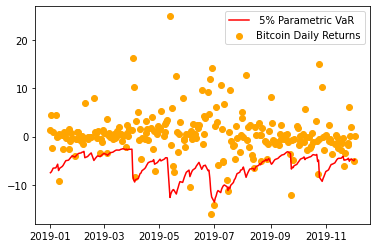

In [163]:
# 5% Parametric Quantile
q_parametric = basic_gm.distribution.ppf(0.05, nu)

# parametric Value at Risk: mean + volatility * parametric quantile
parametric_VaR = mean_forecast.values + np.sqrt(variance_forecast).values * q_parametric
parametric_VaR = pd.DataFrame(parametric_VaR, columns= ["5%"], index = variance_forecast.index)

# plot returns from 2019 and later.
plt.scatter(x=variance_forecast.index, y=modified_bitcoin_data.Return["2019-01-01":], color="orange", label="Bitcoin Daily Returns")

# plot parametric Value at Risk
plt.plot(parametric_VaR, color= "red", label =" 5% Parametric VaR")

plt.legend(loc = "upper right")
plt.show()

#### Empirical Value at Risk
The empirical value at risk is derived through the _observed_ distribution of the standard residuals. We can derive the quantile through `.quantile()` on the observed standard residuals of our GARCH model.

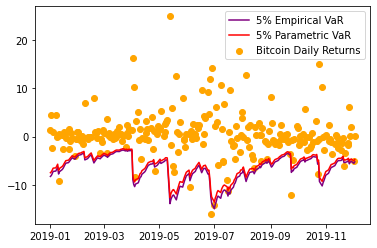

In [164]:
q_empirical = gm_result.std_resid.quantile(0.05)

empirical_VaR = mean_forecast.values + np.sqrt(variance_forecast).values * q_empirical
empirical_VaR = pd.DataFrame(empirical_VaR, columns= ["5%"], index = variance_forecast.index)

# plot returns from 2019 and later.
plt.scatter(x=variance_forecast.index, y=modified_bitcoin_data.Return["2019-01-01":], color="orange", label="Bitcoin Daily Returns")

# plot empirical Value at Risk
plt.plot(empirical_VaR, color= "purple", label = "5% Empirical VaR")

# plot parametric Value at Risk for comparison
plt.plot(parametric_VaR, color = "red", label = "5% Parametric VaR")

plt.legend(loc = "upper right")
plt.show()

The parametric and empirical Value at Risk visualized above are quite similar - and with both versions, the count of VaR exceedances is roughly around four - so assuming a tolerance for 12.5 exceedances in a trading year (read above), our model is doing a decent job. The empirical VaRs have a bigger loss estimation, which implies that the assumed residuals based on the theoretical t-distribution of the model might underestimate the downside risks.

### Dynamic Covariance between two models
We can determine the covariance of two models to incorporate their time-dependent characteristic of volatility. For example, a stock may have a positive covariance to another stock, meaning they both appreciate and depreciate in the same direction. If we want to reduce risk, we may not want to have a portfolio of just positive covariance between its assets. Otherwise, this scenario would translate to: "one falls, all fall", leading to strong changes in a portfolios value (positive and negative). 

Therefore, we can also make use of detection negative covariance between two assets that develop in opposing directions. If one of our assets depreciate in value, the value of an asset with a negative covariance to it is supposed to appreciate. We can thus _reduce our risk by maintaining a good analysis of positive and negative covariance between our assets_. We **diversify our risk**.

One example of the wide use of this method is depicted in the common _Modern Portfolio Therapy_ that capitalizes on a variance analysis to evaluate portfolios.

### Beta
The ${\beta}$ (beta) value indicates the level of risk in comparison to a derivate benchmark (for US stocks commonly the S&P500). 

* ${{\beta} = 1} — equal to the benchmark and shows no higher risk than usual.
* ${{\beta} > 1} — over the benchmark and indicates a higher risk than usual. (more return required)
* ${{\beta} < 1} — below the benchmark and indicates a lower risk than usual. (less return required)

The ${\beta}$ is the relation of an asset to it's benchmark factored by their correlation.
In an equation, this can be easier understood:

## ${\beta = {{\rho} * {{\sigma}_{x} \over {\sigma}_{benchmark}}}}$

where
* ${\rho}$ is the correlation factor between both asset and market standard residual
* ${\sigma}_{x}$ is the volatility (std. deviation) of the asset _x_
* ${{\sigma}_{benchmark}}$ is the volatility of the benchmark (usually the market, e.g. SP500)



#### Beta in CAPM

In the Capital Asset Pricing Model (CAPM), tocalculate the return by the influence of beta, the following equation can be applied:

### ${{E(R}_{S}) = {R}_{f} + {\beta}(E({R)_{m}} - {R}_{f})}$

with
* ${E({R}_{S})}$ as _required rate of return_
* ${R}_{f}$ as _risk-free rate_ (e.g. Treasuries)
* ${E({R}_{m})}$ as _market expected return_ (e.g. S&P500)
* The calculation ${E({R)_{m}} - {R}_{f})}$ can also be understood as the _market premium_



#### Computing dynamic stock Beta

In [165]:
#Preparing GARCH models
tesla_data = pd.read_csv("./datasets/Tesla.csv")

tesla_gm = arch_model(tesla_data["Return"], p = 1, q = 1, vol="GARCH", mean="constant", dist="t")
sp500_gm = arch_model(sp_data["Return"], p = 1, q = 1, vol="GARCH", mean="constant", dist="t")

tesla_results = tesla_gm.fit();
sp500_results = sp500_gm.fit();


Iteration:      1,   Func. Count:      7,   Neg. LLF: 52007.218376519115
Iteration:      2,   Func. Count:     15,   Neg. LLF: 53475.66843216594
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8953.81742025309
Iteration:      4,   Func. Count:     31,   Neg. LLF: 7489.277711975998
Iteration:      5,   Func. Count:     38,   Neg. LLF: 6027.000497388252
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5782.791411328699
Iteration:      7,   Func. Count:     52,   Neg. LLF: 5792.894554830891
Iteration:      8,   Func. Count:     59,   Neg. LLF: 5786.2119269851155
Iteration:      9,   Func. Count:     66,   Neg. LLF: 5783.725819183511
Iteration:     10,   Func. Count:     73,   Neg. LLF: 5782.033716256287
Iteration:     11,   Func. Count:     80,   Neg. LLF: 7071.550341938622
Iteration:     12,   Func. Count:     87,   Neg. LLF: 5780.400205815155
Iteration:     13,   Func. Count:     94,   Neg. LLF: 5773.444435571582
Iteration:     14,   Func. Count:    101,   Neg. LLF: 5773.2666

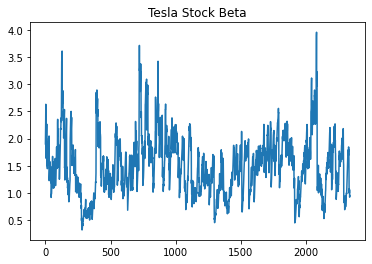

In [166]:
tesla_resid = tesla_results.std_resid
sp500_resid = sp500_results.std_resid

tesla_vol = tesla_results.conditional_volatility
sp500_vol = sp500_results.conditional_volatility

correlation = np.corrcoef(tesla_resid, sp500_resid)[0, 1]

beta = correlation * (tesla_vol / sp500_vol)

plt.plot(beta)
plt.title("Tesla Stock Beta")
plt.show()